In [55]:
from os import path
import glob

# Third-party
from astropy.table import Table
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from numpy.lib.recfunctions import stack_arrays
from sfd import reddening
from dustmaps.sfd import SFDQuery

In [2]:
all_filename = '../data/schlafly-ps1.fits'
if not path.exists(all_filename):
    arrs = []
    for filename in glob.glob('../data/schlafly-ps1/*.fits.gz'):
        arrs.append(np.array(fits.getdata(filename)))
    arr = stack_arrays(arrs, asrecarray=True, usemask=False)
    t_ = Table(arr)
    
    # remove a bunch of columns
    t_[t_.colnames[:22]].write(all_filename)

In [10]:
t = Table.read(all_filename)

---

In [53]:
c = coord.SkyCoord(ra=t['ra'] * u.deg, dec=t['dec'] * u.deg)
mask = c.separation(coord.SkyCoord(ra=179*u.deg, dec=-29.5*u.deg)) < 0.75*u.deg

In [57]:
Agrizy = reddening(c, 'PS1', 'grizy')

In [59]:
g = (t['mean(0)'] * (3631*u.Jy)).to(u.ABmag).value
r = (t['mean(1)'] * (3631*u.Jy)).to(u.ABmag).value
i = (t['mean(2)'] * (3631*u.Jy)).to(u.ABmag).value

/Users/adrian/anaconda/lib/python3.6/site-packages/astropy/units/function/logarithmic.py:44: RuntimeWarning: divide by zero encountered in log10
  return dex.to(self._function_unit, np.log10(x))


In [60]:
col = (g - i) - (Agrizy[:, 0] - Agrizy[:, 2])
mag = g - Agrizy[:, 0]

/Users/adrian/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


(23, 13)

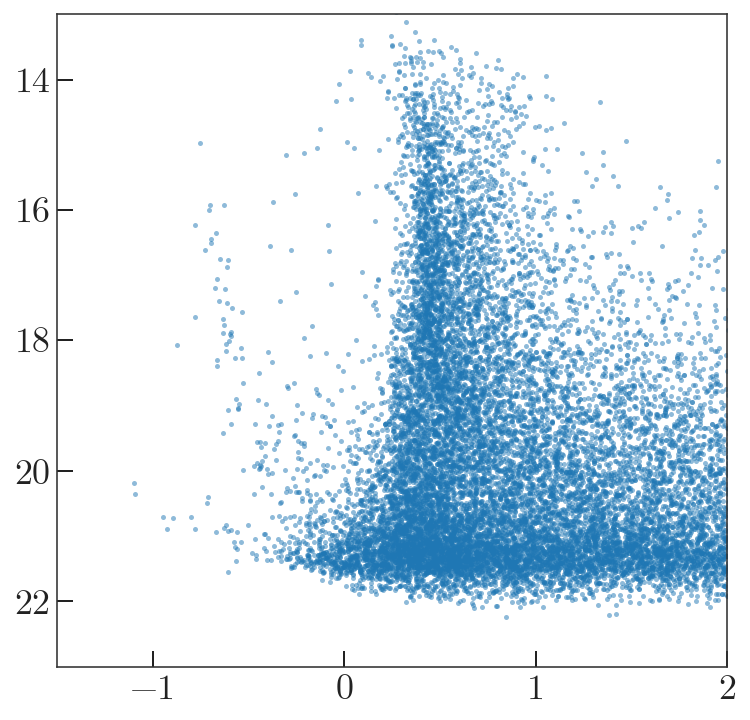

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(col[mask], mag[mask], marker='.', ls='none', alpha=0.5)
ax.set_xlim(-1.5, 2)
ax.set_ylim(23, 13)